This file contains function definitions used in all simulations

In [10]:
%load_ext autoreload
%autoreload 2
import all_function_defs as f

import cobra
import pandas as pd
import os
from os.path import join
from cobra import Model, Reaction, Metabolite
from cobra.sampling import sampling
import numpy as np 
os.environ["R_HOME"] = f"{os.environ['CONDA_PREFIX']}\\Lib\\R"
import rpy2.robjects
from plotnine import *
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from cobra.flux_analysis.loopless import loopless_solution
from matplotlib import colormaps
import matplotlib
from cobra.sampling import sample



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [74]:
# Sampling

i = 0
growth_rates = [0.033, 0.082468, 0.123068,  0.17302, 0.233464] #[0.033961, 0.082468, 0.123068,  0.17302, 0.233464]
glucose_uptakes = [0.476, 1.114, 1.648, 2.305, 3.1] 

# growth_rates = [0.049, 0.100, 0.151, 0.203, 0.301]


model=cobra.io.read_sbml_model(model_path) # It's important to load the original model again each time before optimizing again (otherwise the solution differs as the initial conditions would differ)
# model.objective = biomass_rxn_ID 

model.reactions.get_by_id(glc_ID).bounds = -(glucose_uptakes[i]), -(glucose_uptakes[i])  # NB! It's also possible to change glucose uptake from model.medium dictionary, but that gives differences in solution fluxes
model.reactions.get_by_id(biomass_rxn_ID).bounds = (growth_rates[i]), (growth_rates[i])
    
# solution = model.optimize()
# solution = loopless_solution(model)

# solution

In [62]:
s = sample(model, 1000)
s

Read LP format model from file C:\Users\Maive\AppData\Local\Temp\tmpi2ajtc3y.lp
Reading time = 0.02 seconds
: 2052 rows, 4802 columns, 19778 nonzeros


,ALCD25yi,MTHFCm,AMPN,DAGCPTer_RT,PYRt2,NNDPRm,HMGCOASm,PDE4,PAPSR,FACOAL80p,...,BTNt2i,EX_fol_e,FOLt,NADtm,EX_pydxn_e,PYDXNtr,RIBFLVt2,tr_0001,EXC_OUT_phyto_d,MDHc
0,0.0,0.0,0.0,3.062521e-09,0.0,0.0,-0.000033,0.000480,0.0,0.0,...,0.0,0.0,0.0,3.116404e-18,0.0,0.0,0.0,0.0,0.0,-0.217863
1,0.0,0.0,0.0,2.550186e-06,0.0,0.0,0.001892,0.004783,0.0,0.0,...,0.0,0.0,0.0,1.562145e-16,0.0,0.0,0.0,0.0,0.0,-0.429690
2,0.0,0.0,0.0,4.346490e-06,0.0,0.0,0.001698,0.001054,0.0,0.0,...,0.0,0.0,0.0,-2.363415e-15,0.0,0.0,0.0,0.0,0.0,-0.466325
3,0.0,0.0,0.0,1.193253e-06,0.0,0.0,-0.001094,0.003451,0.0,0.0,...,0.0,0.0,0.0,-2.147012e-15,0.0,0.0,0.0,0.0,0.0,-0.289095
4,0.0,0.0,0.0,1.458119e-06,0.0,0.0,-0.000810,0.008848,0.0,0.0,...,0.0,0.0,0.0,-4.745392e-16,0.0,0.0,0.0,0.0,0.0,-0.273791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,2.417271e-06,0.0,0.0,-0.010140,0.001543,0.0,0.0,...,0.0,0.0,0.0,2.050109e-14,0.0,0.0,0.0,0.0,0.0,-0.346235
996,0.0,0.0,0.0,3.360999e-06,0.0,0.0,-0.009292,0.001057,0.0,0.0,...,0.0,0.0,0.0,1.911727e-14,0.0,0.0,0.0,0.0,0.0,-0.362639
997,0.0,0.0,0.0,3.117118e-06,0.0,0.0,-0.007091,0.004213,0.0,0.0,...,0.0,0.0,0.0,2.016316e-14,0.0,0.0,0.0,0.0,0.0,-0.347680
998,0.0,0.0,0.0,7.474500e-06,0.0,0.0,-0.007219,0.004829,0.0,0.0,...,0.0,0.0,0.0,2.311090e-14,0.0,0.0,0.0,0.0,0.0,-0.322316


In [73]:
s[['G6PDH2r', 'ALDD19x_P', 'GND']].describe()

,G6PDH2r,ALDD19x_P,GND
count,1000.000000,1000.000000,1000.000000
mean,0.099693,583.632369,0.099693
std,0.032676,98.718544,0.032676
min,0.019937,82.847665,0.019937
25%,0.077214,523.556279,0.077214
50%,0.099451,592.908472,0.099451
75%,0.121292,648.152415,0.121292
max,0.249552,988.830168,0.249552


(array([ 36., 108., 221., 298., 193., 110.,  25.,   5.,   2.,   2.]),
 array([0.01993711, 0.04289863, 0.06586015, 0.08882167, 0.11178319,
        0.13474471, 0.15770624, 0.18066776, 0.20362928, 0.2265908 ,
        0.24955232]),
 <BarContainer object of 10 artists>)

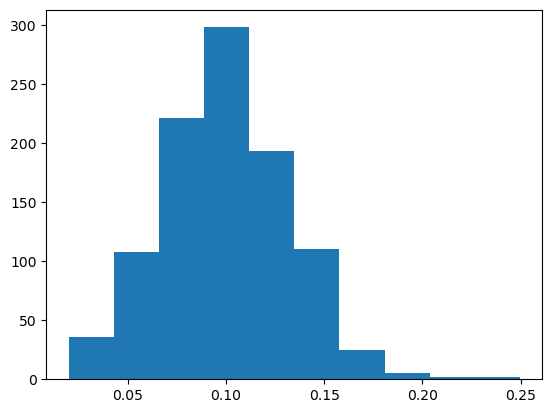

In [70]:
acl = s.loc[:,'G6PDH2r']
plt.hist(acl)
# plt.hist(s.loc[:,'ALDD19x_P'])

In [75]:
model.metabolites.nadph_c.summary()

Percent,Flux,Reaction,Definition
60.69%,0.319,ALDD19x_P,h2o_c + nadp_c + pacald_c --> 2.0 h_c + nadph_c + pac_c
17.24%,0.09063,G6PDH2r,g6p_c + nadp_c <=> 6pgl_c + h_c + nadph_c
17.24%,0.09063,GND,6pgc_c + nadp_c --> co2_c + nadph_c + ru5p__D_c
0.40%,0.002082,PPND2,nadp_c + pphn_c --> 34hpp_c + co2_c + nadph_c
4.43%,0.02331,PYDXOR,h_c + nadph_c + pydx_c <=> nadp_c + pydxn_c
Percent,Flux,Reaction,Definition
1.08%,-0.005687,AASAD1,L2aadp_c + atp_c + h_c + nadph_c --> L2aadp6sa_c + amp_c + nadp_c + ppi_c
2.74%,-0.01439,ASAD,aspsa_c + nadp_c + pi_c <=> 4pasp_c + h_c + nadph_c
0.04%,-0.000212,DHFR,dhf_c + h_c + nadph_c <=> nadp_c + thf_c
0.00%,-2.541E-05,DPR,2dhp_c + h_c + nadph_c --> nadp_c + pant__R_c


In [45]:

# model_path = "C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Model_files\\NP11\\rhto.xml"
# # model_path = f'C:\\Users\\Maive\\Downloads\\rhto-GEM-1.3.0\\ModelFiles\\xml\\rhto.xml'
# glucose_uptakes = [0.476, 1.114, 1.648, 2.305, 3.1] 

# biomass_rxn_ID = "r_4041"   
# glc_ID = 'r_1714'

# model_path = "C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Model_files\\iRhto_models\\iRhtoC.xml"

# model_path = "C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Model_files\\Rt_IFO0880.xml"
# glucose_uptakes = [0.476, 1.114, 1.648, 2.305, 3.1] 

# biomass_rxn_ID = "BIOMASS_RT"   
# glc_ID = 'EX_glc__D_e'
model_path = "C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Model_files\\Rt_IFO0880_jsb.xml"
glucose_uptakes = [0.476, 1.114, 1.648, 2.305, 3.1] 
# growth_rates = [0.049, 0.100, 0.151, 0.203, 0.301]


biomass_rxn_ID = "BIOMASS_RT"   
glc_ID = 'EX_glc__D_e'

# # glucose_uptakes = [0.476, 1.114, 1.648, 2.305, 3.1] 
# i = 3
# model1=cobra.io.read_sbml_model(model_path)
# model1.objective = biomass_rxn_ID
# model1.reactions.get_by_id(glc_ID).bounds = -(glucose_uptakes[i]), -(glucose_uptakes[i]) 
# solution1 = model1.optimize()



In [144]:
model1.reactions.GAPD.name #summary()


'Glyceraldehyde-3-phosphate dehydrogenase'

In [158]:
model1.reactions.ACITL.summary()


In [154]:
model1.metabolites.g6p_c             .name #summary()


'D-Glucose 6-phosphate'

In [161]:
model1.metabolites.cit_c       .summary()


Percent,Flux,Reaction,Definition
100.00%,1.215,CITtam,cit_c + mal__L_m <=> cit_m + mal__L_c
Percent,Flux,Reaction,Definition
76.46%,-0.9291,ACITL,atp_c + cit_c + coa_c --> accoa_c + adp_c + oaa_c + pi_c
23.54%,-0.2861,CITtcm,cit_c + icit_m <=> cit_m + icit_c


In [2]:
model_path = "C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Model_files\\Rt_IFO0880.xml"
glucose_uptakes= [0.476, 1.114, 1.648, 2.305, 3.1] 
biomass_rxn_ID = 'BIOMASS_RT'
glc_ID = 'EX_glc__D_e'

all_fluxes = f.all_fluxes_biomass_max_df(model_path, glucose_uptakes, biomass_rxn_ID, glc_ID)

Set parameter Username
Academic license - for non-commercial use only - expires 2025-01-21


In [4]:
all_fluxes

,ALCD25yi,MTHFCm,AMPN,DAGCPTer_RT,PYRt2,NNDPRm,HMGCOASm,PDE4,PAPSR,FACOAL80p,...,EX_2hxmp_e,SALCNHe,EX_btn_e,BTNt2i,EX_fol_e,FOLt,NADtm,EX_pydxn_e,PYDXNtr,RIBFLVt2
0,0.0,0.0,0.0,0.0,0.0,0.0,-0.003255,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,-0.007917,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,-0.011818,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,-0.016619,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,-0.022427,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
exchange_metabolites = ['EX_glc__D_e', 'EX_o2_e', 'EX_nh4_e','EX_so4_e','EX_pi_e', 'EX_co2_e']
exchange_fluxes = f.metabolites_fluxes(model_path, all_fluxes, exchange_metabolites)
    

In [4]:
intr_metabolites = ['ATPM', 'EX_glc__D_e', 'G6PDH2r', 'TKT1', 'TALA','TKT2', 'FBA', 'PYRDC','PDHm']
intracellular_fluxes = f.metabolites_fluxes(model_path, all_fluxes, intr_metabolites)
acl_pho = ['XPK', 'ACITL']
ACL_phosphoketolase = f.metabolites_fluxes(model_path, all_fluxes, acl_pho)

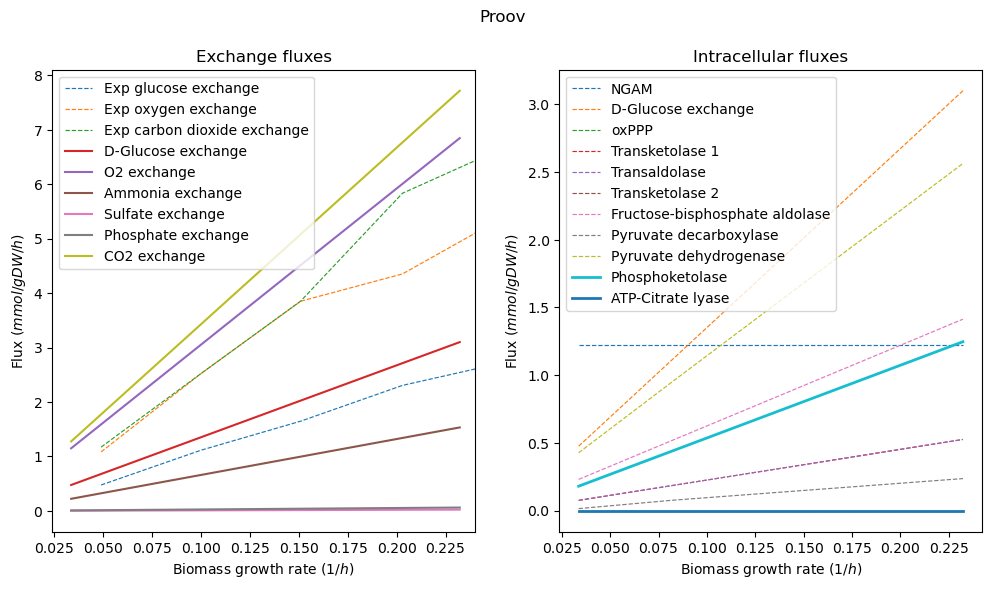

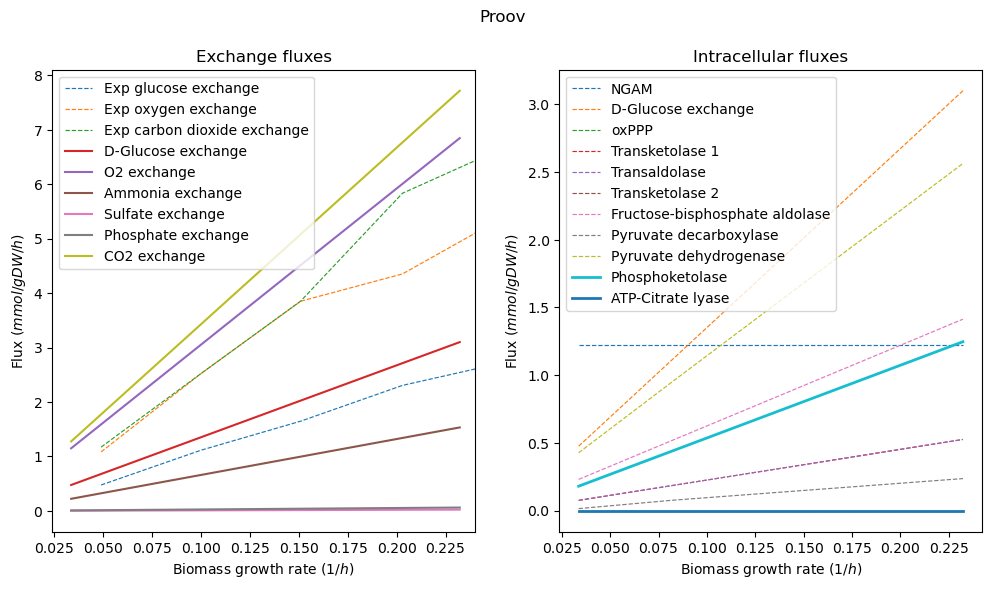

In [30]:
title = 'Proov'
biomass_rxn_ID = 'BIOMASS_RT'
f.plot_ex_intr_fluxes(all_fluxes, exchange_fluxes, intracellular_fluxes, ACL_phosphoketolase, title, biomass_rxn_ID)


C:\Users\Maive\AppData\Local\Temp\ipykernel_18524\3372979759.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.


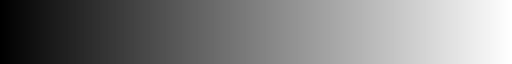

In [7]:
import matplotlib

matplotlib.cm.get_cmap(name='gray', lut=None)

In [8]:

nadphs = ['nadph_c', 'nadph_m', 'nadph_x', 'nadph_r']
nadhs = ['nadh_c', 'nadh_m', 'nadh_x', 'nadh_r']
atps = ['atp_c', 'atp_m', 'atp_x', 'atp_r', 'atp_v', 'atp_n'] 
i = 0


cofactor_fluxes = f.cofactor_balances_biomass_max(model_path, nadphs, glucose_uptakes, i, biomass_rxn_ID, glc_ID)


SUM produced: 0.6029655918070933, SUM consumed: -0.6029655918070933


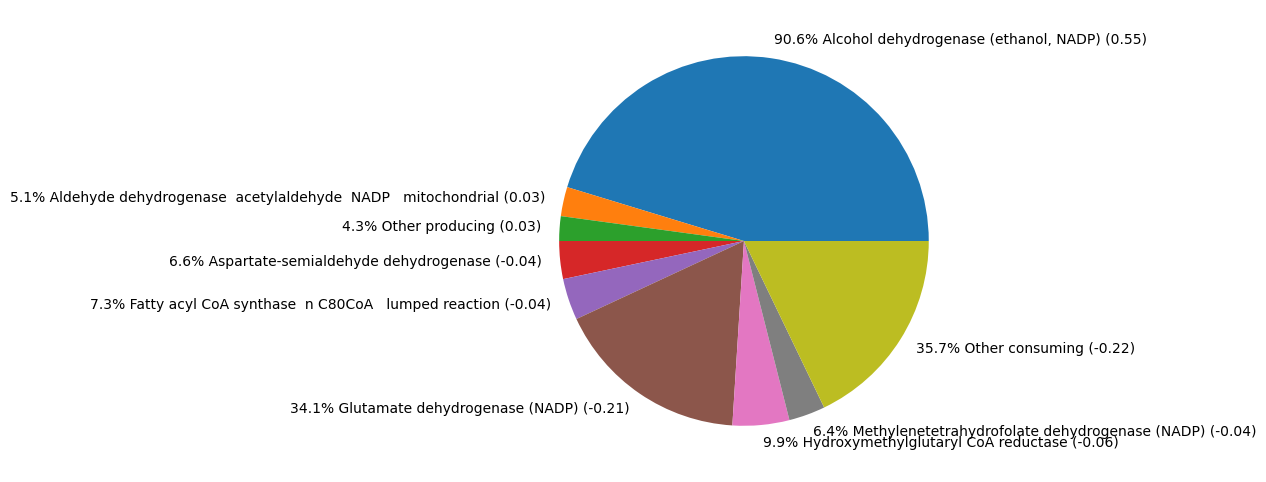

In [20]:
producing_nadph_fluxes_lowest_GR_pie_chart, fig = f.cofactor_fluxes_pie_chart(model_path, cofactor_fluxes)

fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\proov.png")

